In [38]:
import pandas as pd 
%matplotlib inline

# Get Data 

In [39]:
screening_set = pd.read_csv("screening.txt", sep=" ", header=None)
validation = pd.read_csv("validation.txt", sep=" ", header=None)
test = pd.read_csv("test.txt", sep=" ", header=None)

In [40]:
columns = ["Sample", "Risk group", "Age", "Sex", "Smoking F", "Smoking D", "Alcohol F", "Alcohol D", "Betal quid F", "Betal quid D"]
screening_set.columns = columns 
validation.columns = columns 
test.columns=columns 

In [41]:
screening = screening_set.set_index("Sample")
validation = validation.set_index("Sample")
test = test.set_index("Sample")

In [42]:
data = screening.append(validation.append(test))

In [43]:
data.shape

(274, 9)

In [44]:
data.head()

,Risk group,Age,Sex,Smoking F,Smoking D,Alcohol F,Alcohol D,Betal quid F,Betal quid D
Sample,,,,,,,,,
ESCN173Ne,Low,55,F,0,0,0,0,0,0
ESCN174Ne,Low,55,F,0,0,0,0,0,0
HNC478Ne,Low,57,M,0,0,0,0,0,0
HNC606Ne,Low,52,M,0,0,0,0,0,0
HNC633Ne,Low,90,M,0,0,0,0,0,0


# Prepare data

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize 
from sklearn.preprocessing import StandardScaler

In [83]:
age = data["Age"]
age_normalized = normalize([age])
age_normalized[0][:3]

array([0.05359235, 0.0617477 , 0.06873801])

In [47]:
data["Age"] = age_normalized[0]

In [48]:
data = data[data["Risk group"]!="Low"]

In [49]:
data.head()

,Risk group,Age,Sex,Smoking F,Smoking D,Alcohol F,Alcohol D,Betal quid F,Betal quid D
Sample,,,,,,,,,
HNC094Ne,Intermediate,0.046722,M,3,3,1,4,4,3
HNC493Ne,Intermediate,0.053832,M,2,4,4,3,2,3
HNC566Ne,Intermediate,0.059926,F,3,4,2,4,3,2
HNC666Ne,Intermediate,0.084303,M,0,0,0,0,2,2
HNC683Ne,Intermediate,0.067036,M,3,4,4,4,4,4


In [50]:
data["Risk group"] = data["Risk group"].map({"Intermediate":0,"High":1})
data["Sex"]= data["Sex"].map({"F":0, "M":1})

In [51]:
data.head()

,Risk group,Age,Sex,Smoking F,Smoking D,Alcohol F,Alcohol D,Betal quid F,Betal quid D
Sample,,,,,,,,,
HNC094Ne,0,0.046722,1,3,3,1,4,4,3
HNC493Ne,0,0.053832,1,2,4,4,3,2,3
HNC566Ne,0,0.059926,0,3,4,2,4,3,2
HNC666Ne,0,0.084303,1,0,0,0,0,2,2
HNC683Ne,0,0.067036,1,3,4,4,4,4,4


In [52]:
X_data = data.drop("Risk group", axis=1)
y_data = data["Risk group"]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=42)

In [54]:
X_train.shape

(155, 8)

In [55]:
X_test.shape

(52, 8)

# Corelation 

In [56]:
import seaborn as sns 
import matplotlib.pyplot as plt 

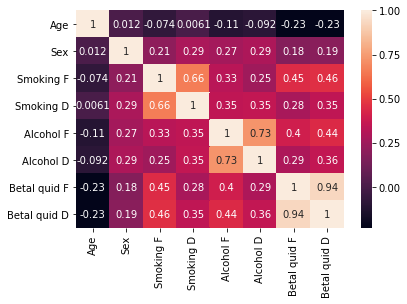

In [57]:
sns.heatmap(X_data.corr(), annot=True)

# Logistic Regression 

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
logreg = LogisticRegression(random_state=42)

### Fit model 

In [60]:
logreg.fit(X_train, y_train)

/home/agnieszka/PycharmProjects/Epilogic/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
prediction = logreg.predict(X_test)

In [62]:
predict_prob = logreg.predict_proba(X_test)

# Metric

In [63]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from pprint import pprint 
from sklearn.metrics import confusion_matrix

In [64]:
accuracy = accuracy_score(y_true=y_test,y_pred=prediction)

In [65]:
accuracy

0.6346153846153846

In [66]:
report = classification_report(y_test, prediction)

### recall - czułość, odsetek prawdziwie pozytywnych (TP/TP+FN) 
### precision - dokładność klasyfikacji w obrębie rozpoznanej klasy (TP/TP+FP) 
### f1-score - 2*(precision*recall/precision+recall) - średnia harmoniczna z precyzji i czułości, miara ta daje ocenę balansu między czułością a prezycją - im bliżej 1 tym lepiej. 

In [67]:
pprint(report)

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.58      0.61      0.60        23\n'
 '           1       0.68      0.66      0.67        29\n'
 '\n'
 '    accuracy                           0.63        52\n'
 '   macro avg       0.63      0.63      0.63        52\n'
 'weighted avg       0.64      0.63      0.64        52\n')


00 - TN 

10 - FN 

11 - TP 

01 - FP 

In [68]:
cm = confusion_matrix(y_test, prediction)

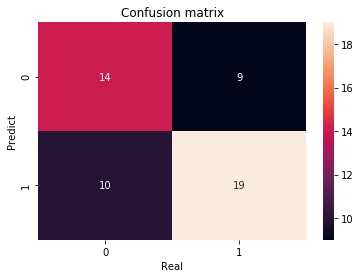

In [69]:
ax = sns.heatmap(cm, annot=True)
ax.set_title("Confusion matrix")
ax.set(ylabel="Predict", xlabel="Real")
plt.show()

# Plot

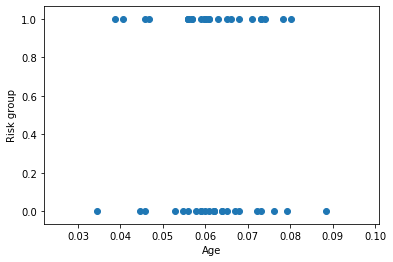

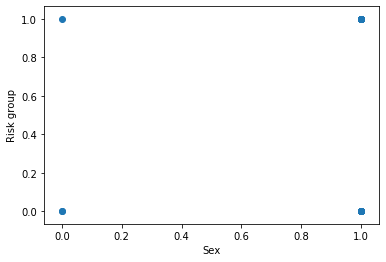

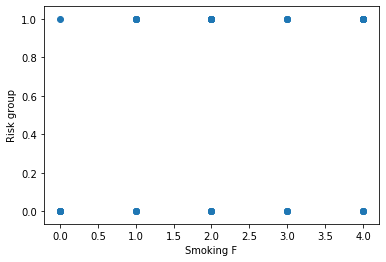

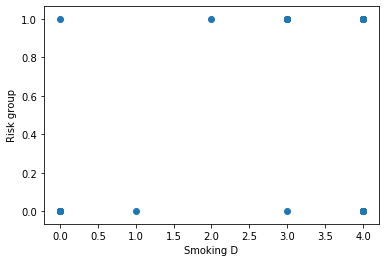

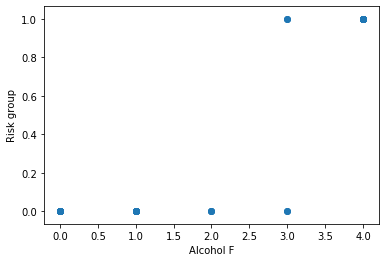

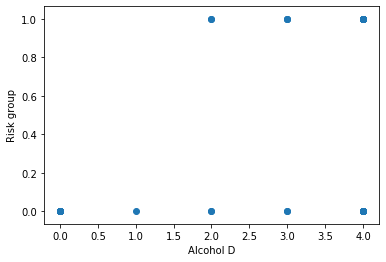

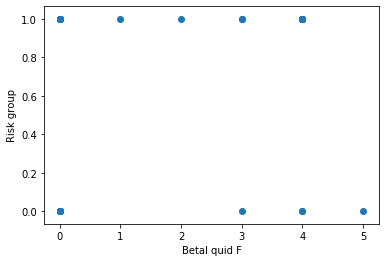

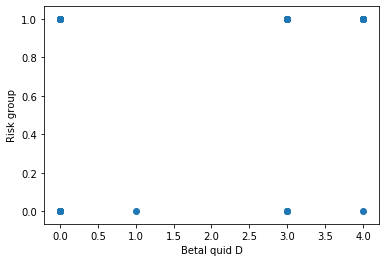

In [70]:
for c in columns[2:]:
    plt.scatter(x=X_test[c], y=prediction)
    plt.xlabel(c)
    plt.ylabel("Risk group")
    plt.show()

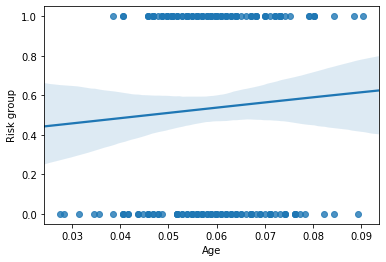

In [71]:
sns.regplot(x="Age", y="Risk group", data=data,  logistic=True)

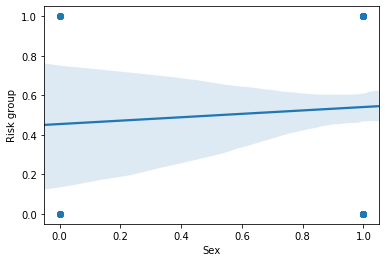

In [72]:
sns.regplot(x="Sex", y="Risk group", data=data,  logistic=True)

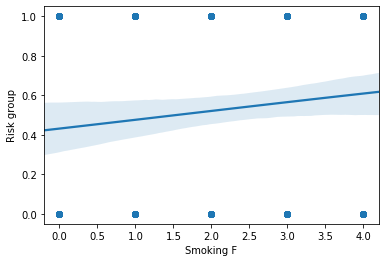

In [73]:
sns.regplot(x="Smoking F", y="Risk group", data=data,  logistic=True)

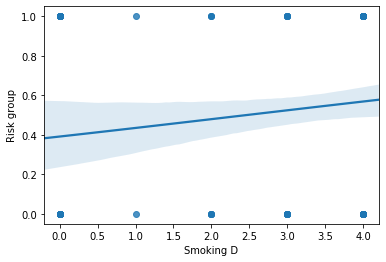

In [74]:
sns.regplot(x="Smoking D", y="Risk group", data=data,  logistic=True)

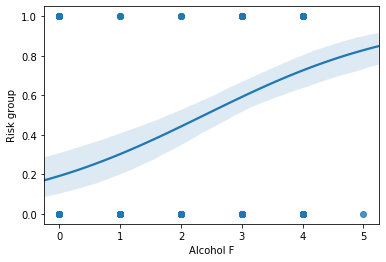

In [75]:
sns.regplot(x="Alcohol F", y="Risk group", data=data,  logistic=True)

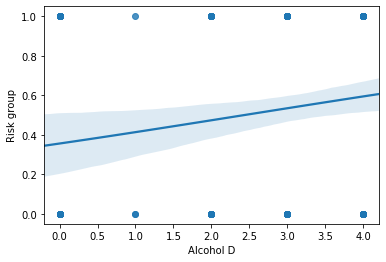

In [76]:
sns.regplot(x="Alcohol D", y="Risk group", data=data,  logistic=True)

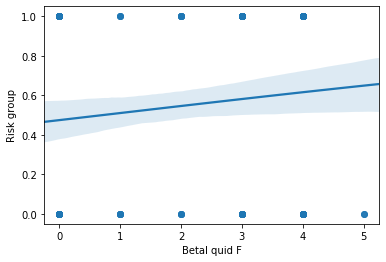

In [77]:
sns.regplot(x="Betal quid F", y="Risk group", data=data,  logistic=True)

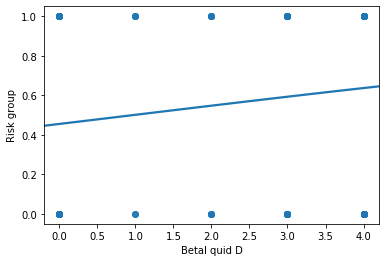

In [85]:
sns.regplot(x="Betal quid D", y="Risk group", data=data,  logistic=True, ci=None)

# ROC

In [79]:
from sklearn.metrics import roc_curve, auc

In [80]:
fpr, tpr, threshold = roc_curve(y_test, predict_prob[:,1])

In [81]:
roc_auc = auc(fpr, tpr)
roc_auc

0.6754122938530734

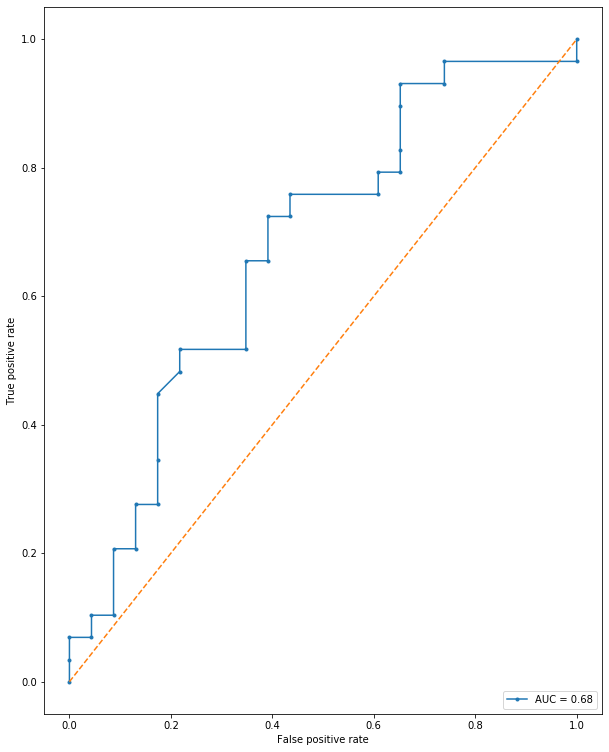

In [84]:
plt.figure(figsize=(10,13))
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc,  marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc = 'lower right')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()